# CSE 351 - Data Science Project
## What Makes People in a Country Happy?
### By Felix Zhu, Kevin Chen, Tommy Lin

## Importing Libraries and Files
<p>We imported all the Python libraries needed to do our project. We also imported the CSV files which are our datasets.</p>

In [1]:
# Importing some Python libraries for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Importing our datasets that contain information about world happiness statistics

df2015 = pd.read_csv('world_happiness/2015.csv')
df2016 = pd.read_csv('world_happiness/2016.csv')
df2017 = pd.read_csv('world_happiness/2017.csv')
df2018 = pd.read_csv('world_happiness/2018.csv')
df2019 = pd.read_csv('world_happiness/2019.csv')

## Observing the Data

In [3]:
# Displaying the 2015 dataset to visualize what features there are.

print("This is the 2015 dataset:")
df2015.head()

# Features include Country, Region, Happiness Rank, Happiness Score, Standard Error, Economy (GDP per Capita),
# Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual.

# These 12 features are provided by the 2015 dataset.

This is the 2015 dataset:


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
# Displaying the 2016 dataset to visualize what features there are.

print("This is the 2016 dataset:")
df2016.head()

# Features include Country, Region, Happiness Rank, Happiness Score, Lower Confidence Interval, Upper Confidence Interval,
# Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual.

# These 13 features are provided by the 2016 dataset.
# Compared to the 2015 dataset, we can already see some noticable differences in features. 
# For example, in the 2016 dataset, we now have 'Lower Confidence Interval' and 'Upper Confidence Interval'.
# However, compared to the 2015 dataset, the 2016 dataset does not have the feature 'Standard Error'.
# These three features may need to be removed from their respective datasets when we clean the data.

This is the 2016 dataset:


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [5]:
# Displaying the 2017 dataset to visualize what features there are.

print("This is the 2017 dataset:")
df2017.head()

# There are 12 features provided by the 2017 dataset.
# On initial observation, there are features that are equal to the features we have already seen, but the name
# of the features are spelled differently. For example, "Happiness Rank" appears are "Happiness.Rank" in this
# dataset. We will need to rename these features later on for more uniformity among all the datasets.

# This 2017 dataset introduces two new features that are unseen from the two previous datasets, which are
# "Whisker.high" and "Whisker.low". We may need to drop these features from the dataset when cleaning the data.
# We also notice that there is no "Region" feature in this dataset.

This is the 2017 dataset:


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [6]:
# Displaying the 2018 dataset to visualize what features there are.

print("This is the 2018 dataset:")
df2018.head()

# There are only 9 features provided by the 2018 dataset, compared to the 2015 (12), 2016 (13), 2017 (12) datasets.
# We noticed that there is a feature "Country or region" that could possibly combine the two features "Country" and 
# "Region". However, based on observing the data, we believe that the feature "Region" from the 2015 and 2016 datasets
# don't provide any useful additional information to us, so we can remove the feature from those datasets later.

# Some features in the 2018 dataset also may be named differently from their corresponding features in the previously
# observed datasets. For example, "Score" in the 2018 dataset may be the "Happiness Score" from other datasets.
# "Social support" feature may actually be the "Family" feature. "Perceptions of corruption" may actually be the
# "Dystopia Residual" feature. "Freedom to make life choices" may actually be the "Freedom" feature.
# All of these mentioned features will have to be renamed later on to ensure uniformity among the datasets.

This is the 2018 dataset:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [7]:
# Displaying the 2019 dataset to visualize what features there are.

print("This is the 2019 dataset:")
df2019.head()

# These are the same 9 features as the 2018 dataset. 
# The same details mentioned for the 2018 dataset could be applied to this dataset too.

This is the 2019 dataset:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# Exploratory Data Analysis

## Cleaning Data
<p>To clean our data, we renamed the columns that way all the names are consistent. We also check for any NULL values and replaced them with the mean value of the column. This way the data does not get changed.</p>

<p>We added the Year column so it is easier for us to use Python library functions later on in our project.</p>

<p>We removed the columns that are not needed (Standard Error, Region, Lower and Upper Confidence Level, Whisker.high and low). Even though the 2018 and 2019 data does not have the Dystopia Residual column, we were able to calculate it by calculating the difference of the happiness score and the sum of all the happiness features.</p>

<p>Note: The 2015, 2016, 2017 data have a column named Family and the 2018 and 2019 data have a column named Social support. Since they are similar features, we named the columns in the data set, 'Family or Social Support.' 

In [8]:
# Country
df2018.rename(columns = {'Country or region': 'Country'}, inplace = True)
df2019.rename(columns = {'Country or region': 'Country'}, inplace = True)

# Happiness Rank
df2017.rename(columns = {'Happiness.Rank': 'Happiness Rank'}, inplace = True)
df2018.rename(columns = {'Overall rank': 'Happiness Rank'}, inplace = True)
df2019.rename(columns = {'Overall rank': 'Happiness Rank'}, inplace = True)

# Happiness Score
df2017.rename(columns = {'Happiness.Score': 'Happiness Score'}, inplace = True)
df2018.rename(columns = {'Score': 'Happiness Score'}, inplace = True)
df2019.rename(columns = {'Score': 'Happiness Score'}, inplace = True)

# Economy
df2015.rename(columns = {'Economy (GDP per Capita)': 'GDP per Capita'}, inplace = True)
df2016.rename(columns = {'Economy (GDP per Capita)': 'GDP per Capita'}, inplace = True)
df2017.rename(columns = {'Economy..GDP.per.Capita.': 'GDP per Capita'}, inplace = True)
df2018.rename(columns = {'GDP per capita': 'GDP per Capita'}, inplace = True)
df2019.rename(columns = {'GDP per capita': 'GDP per Capita'}, inplace = True)

# Freedom
df2018.rename(columns = {'Freedom to make life choices': 'Freedom'}, inplace = True)
df2019.rename(columns = {'Freedom to make life choices': 'Freedom'}, inplace = True)

# Perceptions of Corruption
df2015.rename(columns = {'Trust (Government Corruption)': 'Trust'}, inplace = True)
df2016.rename(columns = {'Trust (Government Corruption)': 'Trust'}, inplace = True)
df2017.rename(columns = {'Trust..Government.Corruption.': 'Trust'}, inplace = True)
df2018.rename(columns = {'Perceptions of corruption': 'Trust'}, inplace = True)
df2019.rename(columns = {'Perceptions of corruption': 'Trust'}, inplace = True)

# Family or Social Support
df2015.rename(columns = {'Family': 'Family or Social Support'}, inplace = True)
df2016.rename(columns = {'Family': 'Family or Social Support'}, inplace = True)
df2017.rename(columns = {'Family': 'Family or Social Support'}, inplace = True)
df2018.rename(columns = {'Social support': 'Family or Social Support'}, inplace = True)
df2019.rename(columns = {'Social support': 'Family or Social Support'}, inplace = True)

# Life Expectancy
df2015.rename(columns = {'Health (Life Expectancy)': 'Life Expectancy'}, inplace = True)
df2016.rename(columns = {'Health (Life Expectancy)': 'Life Expectancy'}, inplace = True)
df2017.rename(columns = {'Health..Life.Expectancy.': 'Life Expectancy'}, inplace = True)
df2018.rename(columns = {'Healthy life expectancy': 'Life Expectancy'}, inplace = True)
df2019.rename(columns = {'Healthy life expectancy': 'Life Expectancy'}, inplace = True)

# Drop columns that we do not need
df2015.drop('Standard Error', inplace = True, axis = 1)
df2015.drop('Region', inplace = True, axis = 1)
df2016.drop('Region', inplace = True, axis = 1)
df2016.drop('Lower Confidence Interval', inplace = True, axis = 1)
df2016.drop('Upper Confidence Interval', inplace = True, axis = 1)
df2017.drop('Whisker.high', inplace = True, axis = 1)
df2017.drop('Whisker.low', inplace = True, axis = 1)

# Adding the year column
df2015['Year'] = 2015
df2016['Year'] = 2016
df2017['Year'] = 2017
df2018['Year'] = 2018
df2019['Year'] = 2019

In [9]:
# The 2018 data set has a NULL value in the Trust column!
trust_average = df2018['Trust'].mean()

# Replace Null values with the mean value of the Trust column
df2018['Trust'].fillna(trust_average, inplace=True)

In [10]:
# Dystopia Residual
df2017.rename(columns = {'Dystopia.Residual': 'Dystopia Residual'}, inplace = True)
df2018["Dystopia Residual"] = df2018["Happiness Score"] - df2018["GDP per Capita"] - df2018["Family or Social Support"] - df2018["Life Expectancy"] - df2018["Freedom"] - df2018["Generosity"] - df2018["Trust"]
df2019["Dystopia Residual"] = df2019["Happiness Score"] - df2019["GDP per Capita"] - df2019["Family or Social Support"] - df2019["Life Expectancy"] - df2019["Freedom"] - df2019["Generosity"] - df2019["Trust"]

In [11]:
# Reorganizing column for best output and readability
df2015 = df2015.reindex(columns=['Year','Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Family or Social Support', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])
df2016 = df2016.reindex(columns=['Year','Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Family or Social Support', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])
df2017 = df2017.reindex(columns=['Year','Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Family or Social Support', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])
df2018 = df2018.reindex(columns=['Year','Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Family or Social Support', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])
df2019 = df2019.reindex(columns=['Year','Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Family or Social Support', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])

In [12]:
df2015.head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Family or Social Support,Life Expectancy,Freedom,Trust,Generosity,Dystopia Residual
0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [13]:
df2016.head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Family or Social Support,Life Expectancy,Freedom,Trust,Generosity,Dystopia Residual
0,2016,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,2016,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,2016,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,2016,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,2016,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [14]:
df2017.head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Family or Social Support,Life Expectancy,Freedom,Trust,Generosity,Dystopia Residual
0,2017,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027
1,2017,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707
2,2017,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2.322715
3,2017,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716
4,2017,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,2.430182


In [15]:
df2018.head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Family or Social Support,Life Expectancy,Freedom,Trust,Generosity,Dystopia Residual
0,2018,Finland,1,7.632,1.305,1.592,0.874,0.681,0.393,0.202,2.585
1,2018,Norway,2,7.594,1.456,1.582,0.861,0.686,0.340,0.286,2.383
2,2018,Denmark,3,7.555,1.351,1.590,0.868,0.683,0.408,0.284,2.371
3,2018,Iceland,4,7.495,1.343,1.644,0.914,0.677,0.138,0.353,2.426
4,2018,Switzerland,5,7.487,1.420,1.549,0.927,0.660,0.357,0.256,2.318


In [16]:
df2019.head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Family or Social Support,Life Expectancy,Freedom,Trust,Generosity,Dystopia Residual
0,2019,Finland,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153,2.714
1,2019,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252,2.394
2,2019,Norway,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271,2.241
3,2019,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354,2.401
4,2019,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322,2.394


### What are the central tendencies of happiness score over the years? Did they increase or decrease?
<p>We will analyze the happiness score over the years using both median and mean measures of central tendency. After plotting these values, we will assess which one provides a more meaningful insight into our dataset.</p>

In [17]:
# Create a list from existing df
df_list = [df2015, df2016, df2017, df2018, df2019]

# Merge the df
merged_df = pd.concat(df_list, ignore_index=True)
merged_df

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Family or Social Support,Life Expectancy,Freedom,Trust,Generosity,Dystopia Residual
0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
777,2019,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,0.46700
778,2019,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,0.53100
779,2019,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,1.79200
780,2019,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2.45700


In [18]:
# array for iterating through the years
years = [2015,2016,2017,2018,2019]

# dictionary to store the counts of countries through the years
# we want to see which countries don't appear in all years.
country_counts = {}

for year in years:
    yearly_df = merged_df[merged_df['Year'] == year]
    for country in yearly_df['Country'].unique():
        if country in country_counts:
            country_counts[country] += 1
        else:
            country_counts[country] = 1

incomplete_countries = []
for country, count in country_counts.items():
    if count < len(years):
        incomplete_countries.append(country)

print("These are the countries that don't show up in all 5 years:\n",incomplete_countries)
print("These are how many countries don't show up in all 5 years:",len(incomplete_countries))


These are the countries that don't show up in all 5 years:
 ['Oman', 'Taiwan', 'Suriname', 'Trinidad and Tobago', 'North Cyprus', 'Hong Kong', 'Somaliland region', 'Macedonia', 'Mozambique', 'Lesotho', 'Laos', 'Swaziland', 'Sudan', 'Djibouti', 'Angola', 'Comoros', 'Central African Republic', 'Puerto Rico', 'Belize', 'Somalia', 'Somaliland Region', 'Namibia', 'South Sudan', 'Taiwan Province of China', 'Hong Kong S.A.R., China', 'Trinidad & Tobago', 'Northern Cyprus', 'North Macedonia', 'Gambia']
These are how many countries don't show up in all 5 years: 29


In [19]:
# There are some inconsistencies in the name of the countries from one
# year to another so renaming certain regions that stood out when
# observing the datasets. Examples: Hong Kong, Taiwan, Trinidad & Tobago

replace_dict = {
    'Somaliland region': 'Somaliland Region',
    'North Cyprus': 'Northern Cyprus',
    'Hong Kong S.A.R., China': 'Hong Kong',
    'Taiwan Province of China': 'Taiwan',
    'Trinidad & Tobago': 'Trinidad and Tobago',
    'North Macedonia': 'Macedonia'
}

merged_df['Country'].replace(replace_dict, inplace=True)

In [20]:
# Displaying the incomplete countries that don't appear in all 5 years
# to see if there is any changes.

country_counts = {}

for year in years:
    yearly_df = merged_df[merged_df['Year'] == year]
    for country in yearly_df['Country'].unique():
        if country in country_counts:
            country_counts[country] += 1
        else:
            country_counts[country] = 1

incomplete_countries = []
for country, count in country_counts.items():
    if count < len(years):
        incomplete_countries.append(country)

print("These are the countries that don't show up in all 5 years:\n",incomplete_countries)
print("These are how many countries don't show up in all 5 years:",len(incomplete_countries))



These are the countries that don't show up in all 5 years:
 ['Oman', 'Suriname', 'Somaliland Region', 'Mozambique', 'Lesotho', 'Laos', 'Swaziland', 'Sudan', 'Djibouti', 'Angola', 'Comoros', 'Central African Republic', 'Puerto Rico', 'Belize', 'Somalia', 'Namibia', 'South Sudan', 'Gambia']
These are how many countries don't show up in all 5 years: 18


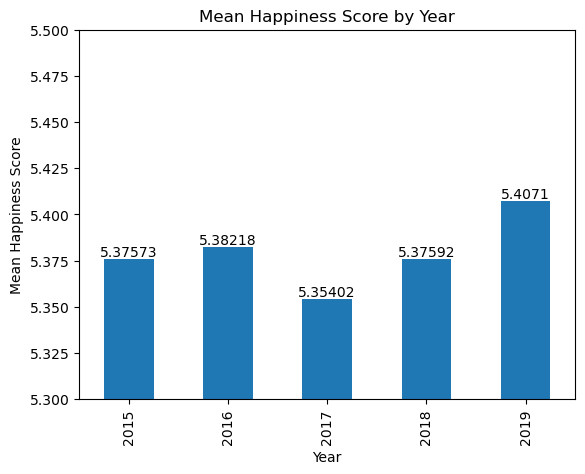

In [21]:
# Graph the mean of each year
mean = merged_df[['Year', 'Happiness Score']]
mean.set_index("Year", inplace=True)  # Set the index to "Year"
mean = mean.groupby("Year")['Happiness Score'].mean().to_frame()
ax = mean.plot(kind ='bar', title='Mean Happiness Score by Year', xlabel='Year', ylabel='Mean Happiness Score', legend=False)

# Zooming in on a specific range of values for better visualization
ax.set_ylim([5.3, 5.5])

# Label each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

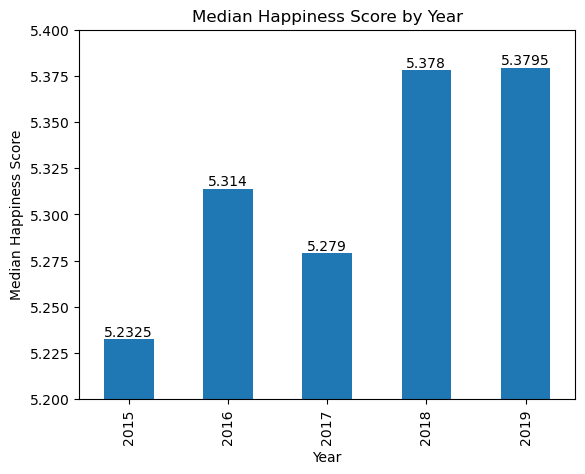

In [22]:
# Graph the median of each year
median = merged_df[['Year', 'Happiness Score']]
median.set_index("Year", inplace=True)  # Set the index to "Year"
median = median.groupby("Year")['Happiness Score'].median().to_frame()
ax = median.plot(kind ='bar', title='Median Happiness Score by Year', xlabel='Year', ylabel='Median Happiness Score', legend=False)

# Zooming in on a specific range of values for better visualization
ax.set_ylim([5.2, 5.4])

# Label each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

In [23]:
# Print summary statistics of dataframes
for year in df_list:
    df = year
    print(df['Year'][0])
    print(df['Happiness Score'].describe())
    print('----------')

2015
count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness Score, dtype: float64
----------
2016
count    157.000000
mean       5.382185
std        1.141674
min        2.905000
25%        4.404000
50%        5.314000
75%        6.269000
max        7.526000
Name: Happiness Score, dtype: float64
----------
2017
count    155.000000
mean       5.354019
std        1.131230
min        2.693000
25%        4.505500
50%        5.279000
75%        6.101500
max        7.537000
Name: Happiness Score, dtype: float64
----------
2018
count    156.000000
mean       5.375917
std        1.119506
min        2.905000
25%        4.453750
50%        5.378000
75%        6.168500
max        7.632000
Name: Happiness Score, dtype: float64
----------
2019
count    156.000000
mean       5.407096
std        1.113120
min        2.853000
25%        4.544500
50%        5.379500
75%        6.184500

<p>By examining the two graphs, we can see that the Happiness Score tends to rise from 2015 to 2019, with the exception of a drop from 2016 to 2017. Additionally, the graph indicates that the data is skewed to the right, since the average Happiness Score remains higher than the median over time. To obtain a more precise representation of the sample set, it would be advisable to rely on the median, given the skewed distribution of the data.

Median Happiness Scores by Year:
- 2015: 5.2325
- 2016: 5.3822
- 2017: 5.2790
- 2018: 5.3780
- 2019: 5.3795</p>

### Which countries have stable rankings over the years? Which countries improved their rankings?

We will be looking at the countries from each year and compare their rankings between the years, so we will be dealing with the "Year", "Country", and "Happiness Rank" features from our dataset. 

In [24]:
# create a dictionary to store the range of rankings for each country
rank_range = {}

# loop through each country in the dataframe
for country in merged_df['Country'].unique():
    # create a list to store the rankings for this country over the years
    ranks = []
    # loop through each year
    for year in merged_df['Year'].unique():
        # get the happiness rank for this country and year
        rank = merged_df.loc[(merged_df['Country'] == country) & (merged_df['Year'] == year), 'Happiness Rank'].values
        # if the country is not ranked in this year, skip it
        if len(rank) == 0:
            continue
        # append the rank to the list
        ranks.append(rank[0])
    # calculate the range of the ranks
    rank_range[country] = max(ranks) - min(ranks)

# get the list of countries with at least a +/- range of 5 between the years
# This is how we identify the definition of stable country in this assignment.
stable_countries = [country for country, rank in rank_range.items() if rank <= 5]
print("Stable countries:")
print(stable_countries)
print("The number of countries that have stable rankings over the years is:",len(stable_countries))

Stable countries:
['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland', 'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Costa Rica', 'Austria', 'Ireland', 'Belgium', 'Oman', 'Uruguay', 'Suriname', 'Trinidad and Tobago', 'Hong Kong', 'Djibouti', 'Angola', 'Comoros', 'Madagascar', 'Rwanda', 'Puerto Rico', 'Belize', 'Gambia']
The number of countries that have stable rankings over the years is: 27


In [25]:
# Create a new dataframe with only the stable countries
stable_df = merged_df[merged_df['Country'].isin(stable_countries)]

# create a pivot table to display the happiness rank for each year and stable country
pivot_df = stable_df.pivot_table(values='Happiness Rank', index='Country', columns='Year')

pivot_df

# We can notice that there are several countries in this pivot table where
# the happiness rank doesn't appear (value is NaN) in all 5 years.
# We will be removing these countries in the next cell.

Year,2015,2016,2017,2018,2019
Country,,,,,
Angola,137.0,141.0,140.0,142.0,NaN
Australia,10.0,9.0,10.0,10.0,11.0
Austria,13.0,12.0,13.0,12.0,10.0
Belgium,19.0,18.0,17.0,16.0,18.0
Belize,NaN,52.0,50.0,49.0,NaN
Canada,5.0,6.0,7.0,7.0,9.0
Comoros,140.0,138.0,NaN,NaN,142.0
Costa Rica,12.0,14.0,12.0,13.0,12.0
Denmark,3.0,1.0,2.0,3.0,2.0


In [26]:
# get the list of countries with less than four years of happiness rank data
incomplete_countries = []
for country in stable_countries:
    if len(stable_df[stable_df['Country']==country]) < 4:
        incomplete_countries.append(country)

# drop the rows with incomplete data from the stable dataframe
stable_df = stable_df[~stable_df['Country'].isin(incomplete_countries)]

# create a pivot table to display the happiness rank for each year and stable country
pivot_df = stable_df.pivot_table(values='Happiness Rank', index='Country', columns='Year')

pivot_df

# The countries that are present in the pivot table appear 4 or more times
# in the dataset, between the years 2015 to 2019. We classify these as being
# stable countries because their Happiness Ranks stay within a 5 rank range 
# through the years of 2015 to 2019.

Year,2015,2016,2017,2018,2019
Country,,,,,
Angola,137.0,141.0,140.0,142.0,NaN
Australia,10.0,9.0,10.0,10.0,11.0
Austria,13.0,12.0,13.0,12.0,10.0
Belgium,19.0,18.0,17.0,16.0,18.0
Canada,5.0,6.0,7.0,7.0,9.0
Costa Rica,12.0,14.0,12.0,13.0,12.0
Denmark,3.0,1.0,2.0,3.0,2.0
Finland,6.0,5.0,5.0,1.0,1.0
Hong Kong,72.0,75.0,71.0,76.0,76.0


### Find out what features contribute to happiness. If you are the president of a country, what would you do to make citizens happier?

In [28]:
#Check number entries in each year. Some countries might not have all 5 year of record.
print(df2015.shape)
print(df2016.shape)
print(df2017.shape)
print(df2018.shape)
print(df2019.shape)

(158, 11)
(157, 11)
(155, 11)
(156, 11)
(156, 11)


In [29]:
# Get list of countries with data for all 5 years
countries_all = []
for country in df2015['Country']:
    if (country in df2016['Country'].unique()) and (country in df2017['Country'].unique()) and (country in df2018['Country'].unique()) and (country in df2019['Country'].unique()):
        countries_all.append(country)
        
#Create new dataframes with only the rows for countries with data for all 5 years
data2015_filtered = df2015[df2015['Country'].isin(countries_all)]
data2016_filtered = df2016[df2016['Country'].isin(countries_all)]
data2017_filtered = df2017[df2017['Country'].isin(countries_all)]
data2018_filtered = df2018[df2018['Country'].isin(countries_all)]
data2019_filtered = df2019[df2019['Country'].isin(countries_all)]

#Print shape of filtered dataframes
print(data2015_filtered.shape)
print(data2016_filtered.shape)
print(data2017_filtered.shape)
print(data2018_filtered.shape)
print(data2019_filtered.shape)

(141, 11)
(141, 11)
(141, 11)
(141, 11)
(141, 11)


In [ ]:
def year_to_feature(col, feature, countries):
    #Create new dataframe for displaying most improved countires
    temp_df = pd.DataFrame(columns=['country', '2015', '2016', '2017', '2018', '2019', 'stdev', feature])
    filtered = [data2015_filtered,data2016_filtered,data2017_filtered,data2018_filtered, data2019_filtered]
    filtered_df = pd.concat(filtered, ignore_index=True)
    
    for country in countries:
        country_df = filtered_df[filtered_df['Country']==country].reset_index()    
        stdev = country_df[col].std()
        change_in_ranking = (country_df.loc[4, col] - country_df.loc[0, col]) / 5

        new_row = {'country': country,
                                '2015': country_df.loc[0, col],
                                '2016': country_df.loc[1, col],
                                '2017': country_df.loc[2, col],
                                '2018': country_df.loc[3, col],
                                '2019': country_df.loc[4, col],
                                'stdev': stdev,
                                feature: change_in_ranking}

        temp_df = pd.concat([temp_df, pd.DataFrame([new_row])])

    #Sort the newly created df by change_in_ranking. The lower the value the better.
    return temp_df.sort_values(feature, ascending=True)

countries = data2015_filtered['Country']
df_sorted = year_to_feature('Happiness Rank', 'change_in_range', countries)

#Top 10 most improved countries
most_improved = df_sorted.head(10)

#Save the countries to an array
top = most_improved['country'].to_numpy()

most_improved

In [ ]:
def graph_df(df, ylabel, title):
    # Extract data for the plot
    x = df.columns[1:-2]
    y = df.values[:, 1:-2].T
    y = y.transpose()
    labels = df['country'].values

    # Set up the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xticks(range(len(x)))
    ax.set_xticklabels(x)
    ax.set_xlabel('Year')
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    # Plot the data
    for i in range(y.shape[0]):
        ax.plot(y[i], '-o', label=labels[i])
    ax.legend(loc='upper left', bbox_to_anchor=(1,1))

    plt.show()
    
graph_df(most_improved, 'Ranking', 'Change in Ranking over Time')

In [ ]:
gdp_df = year_to_feature('GDP per Capita', 'change_in_GDP', top)
graph_df(gdp_df, 'GDP per Capita', 'Change in GDP per Capita over Time')

In [ ]:
social_df = year_to_feature('Family or Social Support', 'change_in_social', top)
graph_df(social_df, 'Family or Social Support', 'Change in Family or Social Support over Time')

In [ ]:
life_df = year_to_feature('Life Expectancy', 'change_in_life', top)
graph_df(life_df, 'Life Expectancy', 'Change in Life Expectancy over Time')

In [ ]:
freedom_df = year_to_feature('Freedom', 'change_in_freedom', top)
graph_df(freedom_df, 'Freedom', 'Change in Freedom over Time')

In [ ]:
trust_df = year_to_feature('Trust', 'change_in_trust', top)
graph_df(trust_df, 'Trust', 'Change in Trust over Time')

In [ ]:
generosity_df = year_to_feature('Generosity', 'change_in_generosity', top)
graph_df(generosity_df, 'Generosity', 'Change in Generosity over Time')